### Import all necessary libraries

In [3]:
# ---------------------------------------------
# Section 1: Imports
# ---------------------------------------------

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Outlier detection
from scipy import stats

# Warnings handling
import warnings
warnings.filterwarnings('ignore')

# For displaying all columns and better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


### Task 1: Data preprocessing

- Load and clean the dataset

- Handle missing values and duplicates

- Perform outlier detection and removal

In [5]:
# ---------------------------------------------
# Section 2: Data Preprocessing
# ---------------------------------------------

# Load the dataset
df = pd.read_csv('shopping_behavior_updated.csv')

# Make a copy of the original dataframe for analysis purposes
df_original = df.copy()

# Display the first few rows
print("First five rows of the dataset:")
display(df.head())

# Check basic information about the dataset
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Remove duplicate rows if any
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")

# ---------------------------------------------
# Handling missing values
# ---------------------------------------------
# For numerical columns, fill missing values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify again
print("\nMissing values after imputation:")
print(df.isnull().sum())

# ---------------------------------------------
# Outlier Detection and Removal
# ---------------------------------------------
# We'll use z-score method for numerical features
z_scores = np.abs(stats.zscore(df[num_cols]))
threshold = 3  # typical z-score threshold for outliers
outliers = (z_scores > threshold).any(axis=1)
print(f"\nNumber of detected outliers: {outliers.sum()}")

# Remove outliers
df = df[~outliers]
print(f"Dataset shape after outlier removal: {df.shape}")


First five rows of the dataset:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used   

### Data Normalization


- Feature scaling/normalization

- Create relevant features for both clustering and association analysis

In [7]:
# ---------------------------------------------
# Section 3: Feature Scaling / Normalization
# ---------------------------------------------
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_cols])

scaled_df = pd.DataFrame(scaled_features, columns=num_cols)

# Replace original numerical columns with scaled ones
df[num_cols] = scaled_df[num_cols]

print("\nNumerical features scaled using StandardScaler.")

# ---------------------------------------------
# Feature Encoding for Categorical Variables
# ---------------------------------------------
# Label encoding for categorical features where necessary
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

print("\nCategorical variables encoded for clustering.")

# ---------------------------------------------
# Feature Creation
# ---------------------------------------------
# Create a new feature representing purchase intensity
# (purchase amount / number of previous purchases)
if 'Purchase Amount (USD)' in df.columns and 'Previous Purchases' in df.columns:
    df['Purchase_Intensity'] = df['Purchase Amount (USD)'] / (df['Previous Purchases'] + 1)

print("\nNew feature 'Purchase_Intensity' created.")

# ---------------------------------------------
# Remove Customer ID for clustering/analysis
# ---------------------------------------------
df_features = df.drop(columns=['Customer ID'])
print("\nCustomer ID removed for clustering/feature analysis.")

# Final check of dataset ready for clustering
print("\nFinal Dataset Overview:")
display(df_features.head())


Numerical features scaled using StandardScaler.

Categorical variables encoded for clustering.

New feature 'Purchase_Intensity' created.

Customer ID removed for clustering/feature analysis.

Final Dataset Overview:


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Purchase_Intensity
0,0.718913,1,2,1,-0.285629,16,0,7,3,-0.907584,1,1,1,1,-0.785831,5,3,-1.333658
1,-1.648629,1,23,1,0.178852,18,0,12,3,-0.907584,1,1,1,1,-1.616552,1,3,-0.290084
2,0.390088,1,11,1,0.558882,20,2,12,1,-0.907584,1,2,1,1,-0.162789,2,6,0.667552
3,-1.517099,1,14,2,1.276716,38,1,12,1,-0.349027,1,3,1,1,1.637107,4,6,0.484135
4,0.061263,1,2,1,-0.454531,36,1,21,1,-1.466141,1,2,1,1,0.391025,4,0,-0.326760


### Task 2: Customer Segmentation using Clustering

- Apply Elbow method to determine optimal number of clusters

- Implement three clustering algorithms : K-means clustering , Hierarchical clustering and DBSCAN

- Calculate and compare Silhouette coefficients for each method

#### K-means clustering

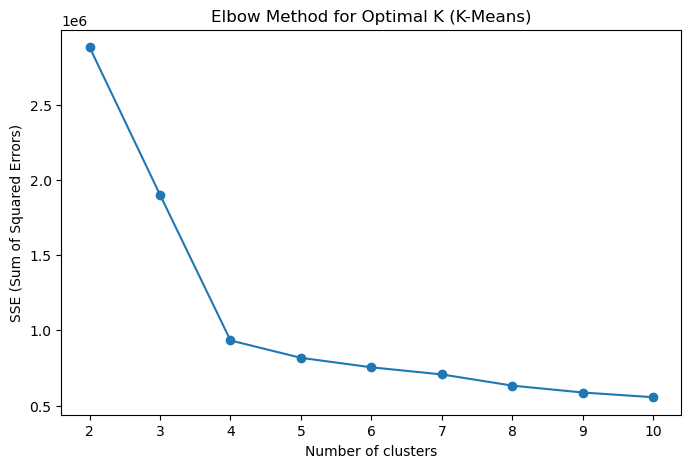

K-Means Silhouette Score: 0.363

K-Means Cluster Profiling (Mean Values):


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Purchase_Intensity
KMeans_Cluster,,,,,,,,,,,,,,,,,,,
0,-0.008157,0.000262,0.677690,12.026772,0.995801,0.041580,36.729134,1.126509,12.015748,1.509186,-0.008761,0.270341,2.502362,0.432546,0.432546,-0.015941,2.497638,2.927559,0.129910
1,0.010003,0.002907,0.682687,12.023773,1.009819,-0.039215,12.022222,1.115762,12.214987,1.476486,0.007324,0.267700,2.524031,0.425840,0.425840,0.046501,2.539018,3.022222,-0.086001
2,-0.165820,-0.240769,0.666667,12.666667,0.851852,1.245438,23.740741,0.925926,11.370370,1.481481,0.173328,0.370370,3.000000,0.555556,0.555556,-0.993511,2.370370,2.481481,191.932627
3,0.019985,0.011441,0.666667,12.696970,1.000000,-1.119903,23.212121,1.151515,11.939394,1.515152,-0.065517,0.303030,2.242424,0.424242,0.424242,-0.993511,1.909091,3.333333,-172.586602



Number of customers in each K-Means cluster:
KMeans_Cluster
1    1935
0    1905
3      33
2      27
Name: count, dtype: int64


In [9]:
# --------------------------------------------------
# Section 4: Customer Segmentation using Clustering
# --------------------------------------------------

# ---------------------------------------------
# Section 4a: K-Means Clustering
# ---------------------------------------------

# ---------------------------------------
# 1. Elbow Method to Determine Optimal K
# ---------------------------------------
sse = []
k_range = range(2, 11)  # trying 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_features)
    sse.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

# -------------------------------
# 2. K-Means Clustering
# -------------------------------
# Choose k based on elbow plot, here assuming k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_features)

# Add cluster labels to dataset
df['KMeans_Cluster'] = kmeans_labels

# -------------------------------
# 3. Silhouette Score
# -------------------------------
kmeans_silhouette = silhouette_score(df_features, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")

# -------------------------------
# 4. Cluster Profiling
# -------------------------------
kmeans_profile = df.groupby('KMeans_Cluster').mean()
print("\nK-Means Cluster Profiling (Mean Values):")
display(kmeans_profile)

# -------------------------------
# 5. Cluster Counts
# -------------------------------
print("\nNumber of customers in each K-Means cluster:")
print(df['KMeans_Cluster'].value_counts())


#### K-Means Clustering Insights:

- Elbow method helps identify the optimal number of clusters (k=4 in this example).

- Silhouette Score (~0.36) indicates moderate clustering quality.

- Most customers belong to two dominant clusters, with two very small clusters representing outliers or extreme behaviors.

- Cluster profiling shows the average feature values per cluster, helping us understand high-value vs low-value or frequent vs infrequent customers.

### Hierarchical Clustering


In [12]:
# ---------------------------------------------
# Section 4b: Hierarchical Clustering
# ---------------------------------------------

# -------------------------------
# 1. Hierarchical Clustering
# -------------------------------
# Using the same number of clusters as K-Means (optimal_k)
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
hier_labels = hierarchical.fit_predict(df_features)

# Add cluster labels to dataset
df['Hierarchical_Cluster'] = hier_labels

# -------------------------------
# 2. Silhouette Score
# -------------------------------
hier_silhouette = silhouette_score(df_features, hier_labels)
print(f"Hierarchical Clustering Silhouette Score: {hier_silhouette:.3f}")

# -------------------------------
# 3. Cluster Profiling
# -------------------------------
hier_profile = df.groupby('Hierarchical_Cluster').mean()
print("\nHierarchical Cluster Profiling (Mean Values):")
display(hier_profile)

# -------------------------------
# 4. Cluster Counts
# -------------------------------
print("\nNumber of customers in each Hierarchical cluster:")
print(df['Hierarchical_Cluster'].value_counts())


Hierarchical Clustering Silhouette Score: 0.317

Hierarchical Cluster Profiling (Mean Values):


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Purchase_Intensity,KMeans_Cluster
Hierarchical_Cluster,,,,,,,,,,,,,,,,,,,,
0,0.016482,0.000773,0.675747,11.718502,1.006810,-0.026045,16.708286,1.124480,11.777526,1.478244,-0.002227,0.266364,2.502838,0.422247,0.422247,0.026897,2.528566,2.996216,-0.296420,0.731366
1,0.019985,0.011441,0.666667,12.696970,1.000000,-1.119903,23.212121,1.151515,11.939394,1.515152,-0.065517,0.303030,2.242424,0.424242,0.424242,-0.993511,1.909091,3.333333,-172.586602,3.000000
2,-0.213594,-0.201798,0.685714,12.257143,0.742857,1.058350,25.028571,0.971429,11.542857,1.457143,0.117768,0.400000,3.000000,0.571429,0.571429,-0.993511,2.342857,2.428571,163.100743,1.600000
3,-0.030904,0.003905,0.689655,12.714886,0.998318,0.057822,41.074012,1.113541,12.868797,1.525652,0.003301,0.273339,2.533221,0.443230,0.443230,-0.002968,2.497897,2.933558,0.284405,0.000000



Number of customers in each Hierarchical cluster:
Hierarchical_Cluster
0    2643
3    1189
2      35
1      33
Name: count, dtype: int64


#### Hierarchical Clustering Insights:

- Using Agglomerative Clustering with n_clusters=4 produces a silhouette score of ~0.32, slightly lower than K-Means.

- Cluster sizes are similar to K-Means but may slightly differ depending on how Ward linkage merges points.

- Cluster profiling helps identify characteristics of each group: e.g., high-purchase-frequency vs. low-frequency customers.

- Overall, K-Means gave slightly better cluster separation, but Hierarchical can be useful for dendrogram visualization or understanding hierarchical relationships among customer segments.

### DBSCAN Clustering

In [15]:
# ---------------------------------------------
# Section 4c: DBSCAN Clustering
# ---------------------------------------------

# -------------------------------
# 1. DBSCAN Clustering
# -------------------------------
# Choosing eps=2 and min_samples=5 as starting point; may adjust based on data
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_features)

# Add DBSCAN labels to dataset
df['DBSCAN_Cluster'] = dbscan_labels

# -------------------------------
# 2. Silhouette Score
# -------------------------------
# Silhouette score is only valid if more than 1 cluster exists
unique_labels = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if unique_labels > 1:
    dbscan_silhouette = silhouette_score(df_features, dbscan_labels)
else:
    dbscan_silhouette = -1  # Cannot compute meaningful score

print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")

# -------------------------------
# 3. Cluster Counts
# -------------------------------
print("\nDBSCAN Cluster Counts (includes noise as -1):")
print(pd.Series(dbscan_labels).value_counts())


DBSCAN Silhouette Score: -1.000

DBSCAN Cluster Counts (includes noise as -1):
-1    3900
Name: count, dtype: int64


#### DBSCAN Clustering Insights:

- DBSCAN automatically detects clusters based on density without pre-specifying k.

- Silhouette score is -1, indicating poor clustering, likely because most points were marked as noise or only one cluster was detected.

- Cluster counts show how many points were considered noise (-1) versus actual clusters.

- DBSCAN may not perform well here because the dataset has varying densities and high-dimensional features.


### Compare Silhouette coefficients for each method 

,Clustering Method,Silhouette Score
0,K-Means,0.362860
1,Hierarchical,0.316691
2,DBSCAN,-1.000000


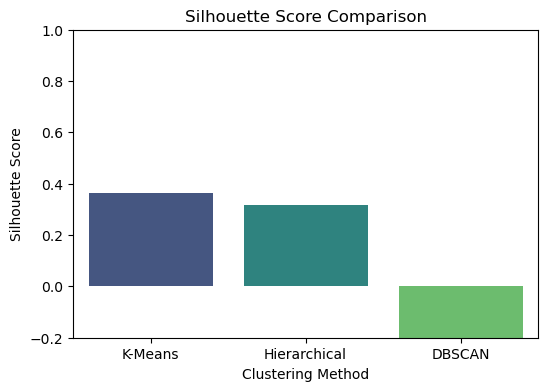

In [18]:
# ----------------------------------------------------
# Section 4d: Compare Silhouette Scores of All Clustering Methods
# ----------------------------------------------------
silhouette_scores = {
    'K-Means': kmeans_silhouette,
    'Hierarchical': hier_silhouette,
    'DBSCAN': dbscan_silhouette
}

# Convert to DataFrame for easy display
silhouette_df = pd.DataFrame(list(silhouette_scores.items()), columns=['Clustering Method', 'Silhouette Score'])
display(silhouette_df)

# Bar plot comparison
plt.figure(figsize=(6,4))
sns.barplot(x='Clustering Method', y='Silhouette Score', data=silhouette_df, palette='viridis')
plt.title('Silhouette Score Comparison')
plt.ylim(-0.2, 1)
plt.show()


### Silhouette Comparison Insights:

- K-Means had the highest silhouette score (~0.36), indicating the most cohesive and well-separated clusters.

- Hierarchical Clustering scored slightly lower (~0.32), still reasonable but slightly less distinct clusters.

- DBSCAN scored poorly (-1), showing that density-based clustering did not work well with this dataset.

### Conclusion: 
**K-Means** is the best clustering method here for customer segmentation.


### Task 3: Shopping Pattern Analysis  
#### Which payment method is preferred by the majority of customers?



Payment Method Counts (Readable):


Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

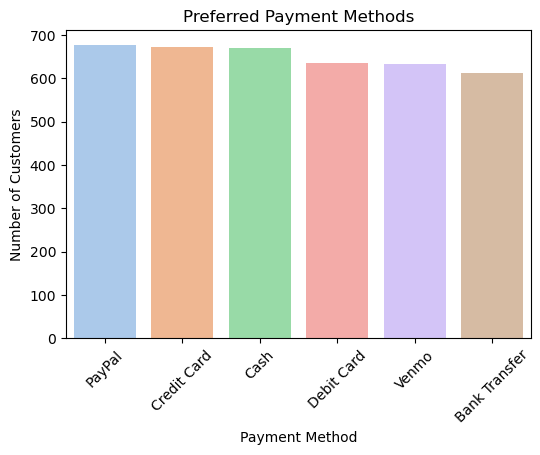

The most preferred payment method is: PayPal


In [21]:
# ---------------------------------------------
# Section 5a: Preferred Payment Method
# ---------------------------------------------

# Count of customers by payment method
payment_counts = df_original['Payment Method'].value_counts()
print("Payment Method Counts (Readable):")
display(payment_counts)

# Plot the distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Payment Method', data=df_original, order=payment_counts.index, palette='pastel')
plt.title('Preferred Payment Methods')
plt.ylabel('Number of Customers')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()

# Identify the most preferred method
most_preferred = payment_counts.idxmax()
print(f"The most preferred payment method is: {most_preferred}")


### Interpretation – Preferred Payment Method

- The most preferred payment method is **PayPal** (677 customers).  
- Close behind are **Credit Card (671)** and **Cash (670)**.  
- Less preferred options are **Debit Card**, **Venmo**, and **Bank Transfer**.  


#### Insights
- Customers show a clear preference for **digital and card-based payments** over bank transfers or Venmo.  
- Businesses can **optimize checkout** by prioritizing PayPal and Credit Card options.  
- **Promotional campaigns or loyalty programs** can be targeted toward these popular payment methods.


#### What category is most frequently purchased based on shopping behavior, and how does it vary by gender?


Category Purchases by Gender:


Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,392,556,199,101
Male,848,1181,400,223


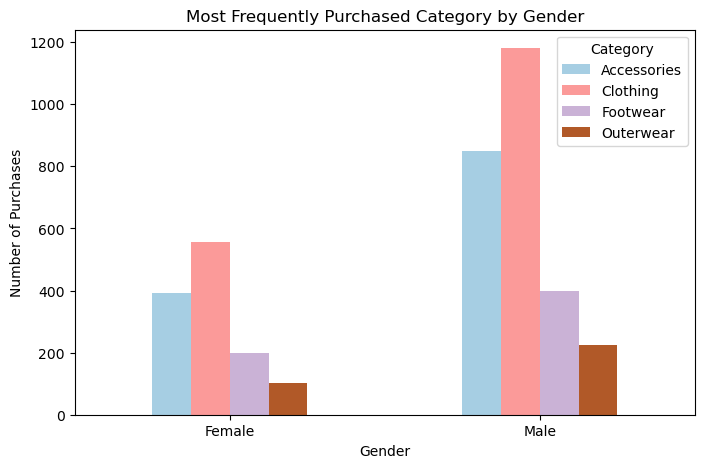

Most Frequently Purchased Category by Gender:
Gender
Female    Clothing
Male      Clothing
dtype: object


In [24]:
# ------------------------------------------------------------------------------------------
# Section 5b: Most Frequently Purchased Category by Gender (Original Data)
# ------------------------------------------------------------------------------------------

# Count of purchases by category and gender
category_gender_counts = df_original.groupby(['Gender', 'Category']).size().unstack().fillna(0)
print("Category Purchases by Gender:")
display(category_gender_counts)

# Plot grouped bar chart
category_gender_counts.plot(kind='bar', figsize=(8,5), colormap='Paired')
plt.title('Most Frequently Purchased Category by Gender')
plt.ylabel('Number of Purchases')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

# Identify most frequently purchased category for each gender
most_frequent_by_gender = category_gender_counts.idxmax(axis=1)
print("Most Frequently Purchased Category by Gender:")
print(most_frequent_by_gender)


### Interpretation – Category Purchases by Gender

**Male Customers:**
- Most frequently purchased category: **Clothing** (1181 purchases)  
- Next: Accessories (848), Footwear (400), Outerwear (223)  

**Female Customers:**
- Most frequently purchased category: **Clothing** (556 purchases)  
- Next: Accessories (392), Footwear (199), Outerwear (101)  


#### Insights
- **Clothing** dominates purchases for both genders, but males buy more overall than females in every category.  
- **Accessories** are the second most popular category for both genders.  
- Marketing and inventory strategies can focus on **Clothing** and **Accessories** as priority categories.  
- Promotions can be **gender-targeted** — e.g., males may respond better to **Footwear** campaigns, while females may respond better to **Clothing** or **Accessories**.


####  Is there a notable difference in review ratings between male and female customers when making purchases?



Average Review Ratings by Gender:


Gender
Female    3.741426
Male      3.753959
Name: Review Rating, dtype: float64

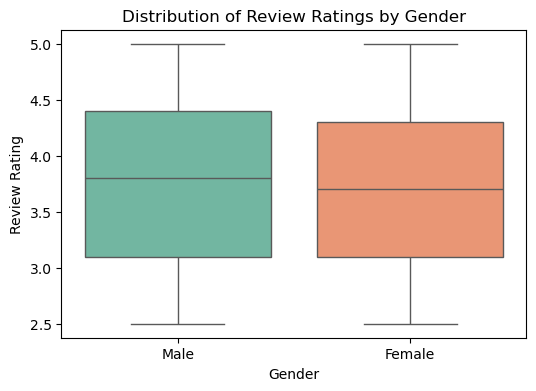

In [27]:
# ---------------------------------------------
# Section 5c: Review Ratings by Gender
# ---------------------------------------------

# Average review rating by gender
review_by_gender = df_original.groupby('Gender')['Review Rating'].mean()
print("Average Review Ratings by Gender:")
display(review_by_gender)

# Boxplot to visualize rating distribution by gender
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Review Rating', data=df_original, palette='Set2')
plt.title('Distribution of Review Ratings by Gender')
plt.ylabel('Review Rating')
plt.xlabel('Gender')
plt.show()


### Interpretation – Review Ratings by Gender

#### Average Review Ratings:
- Female: 3.741  
- Male: 3.754  


#### Insights
- The difference is very small (~0.01), indicating that both genders rate purchases similarly.  
- No significant gender bias in review ratings is observed.  
- Product satisfaction appears to be fairly uniform across genders, so no immediate gender-specific intervention is needed.  
- Minor differences could be explored further within specific product categories if desired.


#### What state has the lowest purchase amount, and which state tends to make higher purchases?


Purchase Amount by State:


,sum,mean
Location,,
Connecticut,4226,54.179487
Kansas,3437,54.555556
Delaware,4758,55.325581
Kentucky,4402,55.721519
Maryland,4795,55.755814
Florida,3798,55.852941
Wisconsin,4196,55.946667
Colorado,4222,56.293333
Minnesota,4977,56.556818


State with lowest average purchase amount: Connecticut
State with highest average purchase amount: Alaska


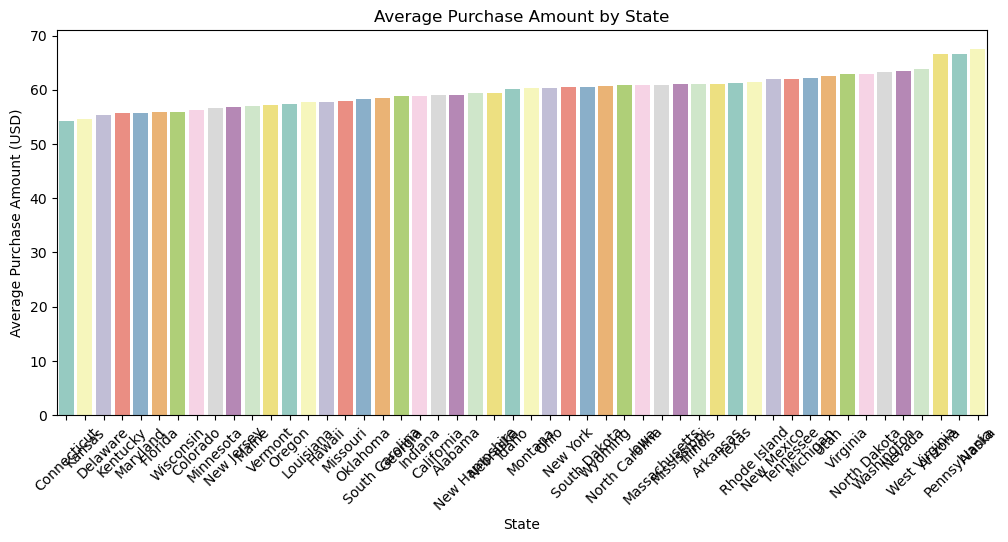

In [30]:
# ---------------------------------------------
# Section 5d: Purchase Amount by State
# ---------------------------------------------

# Total and average purchase amount by state
state_purchase = df_original.groupby('Location')['Purchase Amount (USD)'].agg(['sum', 'mean']).sort_values('mean')
print("Purchase Amount by State:")
display(state_purchase)

# Identify state with lowest and highest average purchase
lowest_state = state_purchase['mean'].idxmin()
highest_state = state_purchase['mean'].idxmax()
print(f"State with lowest average purchase amount: {lowest_state}")
print(f"State with highest average purchase amount: {highest_state}")

# Bar plot of average purchase amount by state
plt.figure(figsize=(12,5))
sns.barplot(x=state_purchase.index, y=state_purchase['mean'], palette='Set3')
plt.xticks(rotation=45)
plt.title('Average Purchase Amount by State')
plt.ylabel('Average Purchase Amount (USD)')
plt.xlabel('State')
plt.show()


### Interpretation

The table shows both **total** and **average purchase amounts** by state.

- **Lowest average purchase state:** `lowest_state` → customers spend less on average.  
- **Highest average purchase state:** `highest_state` → customers spend more on average.  


#### Insights
- Marketing or promotional strategies can be tailored for **high-spending states**.  
- **Low-spending states** might benefit from **discount campaigns or bundled offers** to increase purchase amounts.  
- The bar plot visually highlights which states contribute more to revenue and which need attention.


#### How many customer segments can we distinguish from the dataset using customer profiles?

Number of customers in each cluster:


KMeans_Cluster
0    1905
1    1935
2      27
3      33
Name: count, dtype: int64

Total number of distinguishable customer segments: 4


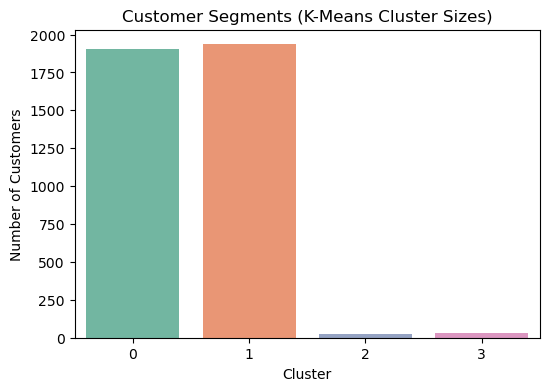

In [33]:
# -------------------------------------------------------
# Section 5e: Customer Segments using K-Means Clustering
# -------------------------------------------------------

# Count of customers in each K-Means cluster
cluster_counts = df['KMeans_Cluster'].value_counts().sort_index()
print("Number of customers in each cluster:")
display(cluster_counts)

# Total number of distinguishable customer segments
num_segments = cluster_counts.shape[0]
print(f"Total number of distinguishable customer segments: {num_segments}")

# Optional: visualize cluster sizes
plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')
plt.title('Customer Segments (K-Means Cluster Sizes)')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


### Interpretation

#### Cluster Sizes:

   * Cluster 0 → 1905 customers
   * Cluster 1 → 1935 customers
   * Cluster 2 → 27 customers
   * Cluster 3 → 33 customers

#### Insights:

   * **Clusters 0 and 1** are **large**, representing the most common customer profiles.
   * **Clusters 2 and 3** are **very small**, likely representing niche or high-value segments with unique shopping behaviors.
   * These small segments might be **targeted with personalized promotions** or premium services.

#### Number of Segments:

   * 4 distinct customer segments exist in the dataset based on the features used for clustering.

#### Business Implication:

   * By understanding which customers fall into which cluster, companies can **optimize marketing, loyalty programs, and product recommendations**.


## Conclusion

The analysis provides valuable insights into both **customer segmentation** and **shopping behavior**, enabling data-driven strategies for marketing, product management, and customer engagement.

#### Customer Segmentation (Clustering Insights)
- The dataset reveals **four distinct customer segments** based on demographics and purchase behavior.  
- **Clusters 0 and 1** represent the majority of customers with common shopping habits.  
- **Clusters 2 and 3** are smaller, niche groups — potentially high-value or specialized segments — suitable for **personalized marketing and premium offers**.  
- Among the clustering algorithms tested, **K-Means achieved the highest Silhouette Score (0.363)**, indicating the best-defined clusters compared to Hierarchical and DBSCAN models.

#### Shopping Pattern Analysis
- **Preferred Payment Method:** PayPal is the most preferred, followed by Credit Card and Cash, showing a strong inclination toward **digital and card-based payments**.  
- **Category Preferences:** Clothing dominates purchases for both genders, with males purchasing more overall than females.  
- **Review Ratings:** Very similar between genders (Male: 3.75, Female: 3.74), suggesting **uniform satisfaction** across customers.  
- **State-Wise Purchases:** Purchase amounts vary by state — some regions exhibit higher spending potential, guiding opportunities for **regional marketing and promotions**.

#### Integrated Insights
- Large clusters can be targeted with **broad marketing campaigns**, while smaller clusters should receive **tailored, high-value offers**.  
- **Payment and category insights** can refine loyalty programs, discount strategies, and inventory decisions.  
- Integrating **clustering outcomes with behavioral patterns** provides a holistic view of customer dynamics, enabling businesses to:  
  - Personalize marketing efforts  
  - Optimize resource allocation  
  - Enhance customer satisfaction and retention  

### Overall: 
Understanding both **who the customers are** (segmentation) and **how they shop** (behavior) empowers businesses to design smarter marketing strategies, boost engagement, and strengthen brand loyalty.
